# vision

In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

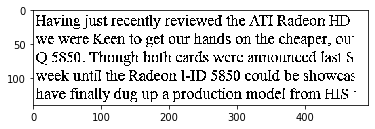

True

In [7]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

## pytesseract를 사용하여 문자인식

In [8]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

print(pytesseract.image_to_string('out.png'))

Having just recently reviewed the ATI Radeon HD

we were Keen to get our hands on the cheaper, ou
Q 5850. Though both cards were announced last S
week until the Radeon 1-ID 5850 could be showcas
have finally dug up a production model from HIS :


In [ ]:
image = cv2.imread('mart3.jpg',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

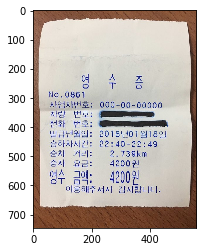

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.


In [14]:
str = pytesseract.image_to_string('mart5.jpg', lang='kor')
img = cv2.imread("mart5.jpg")
imshow("",img)
print(str)

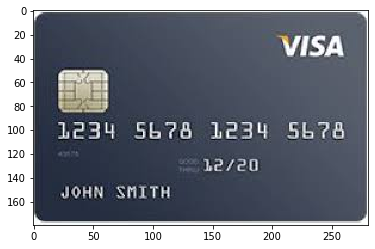

Beh el a iee e ) ira)
Dey)

JOHN SMITH


In [11]:
str = pytesseract.image_to_string('credit-card1.jpg')
img = cv2.imread("credit-card1.jpg")
imshow("",img)
print(str)

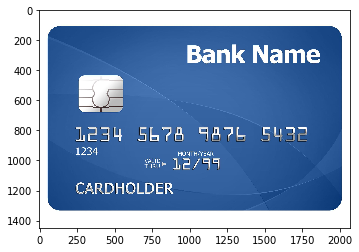

Bank Name

yl

ST eel ice
er MONTH/YEAR
maeo> e744

CARDHOLDER


In [12]:
str = pytesseract.image_to_string('credit-card2.jpg')
img = cv2.imread("credit-card2.jpg")
imshow("",img)
print(str)

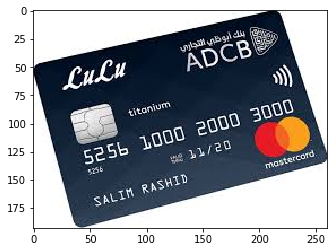

We

[NSS
Lt
ie

   

SY)


In [13]:
str = pytesseract.image_to_string('credit-card3.jpg')
img = cv2.imread("credit-card3.jpg")
imshow("",img)
print(str)

## 사진에서 형태 찾기

### Canny : 이미지의 edge 추출
> cv2.Canny(img, 최소값, 최대값)

canny edge detection 알고리즘에 의한 수치가 최소값보다 작거나 최대값보다 크면 edge로 본다.

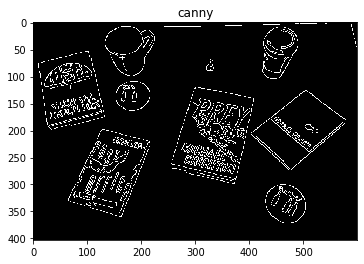

In [15]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 외곽선을 나타내는 함수
edged = cv2.Canny(gray, 10, 250)

imshow("canny",edged) 

### getStructuringElement : 커널 생성 함수
> cv2.getStructuringElement(shape, ksize)

- shape: 커널 모양
    - cv2.MORPH_RECT: 사각형
    - cv2.MORPH_ELLIPSE: 타원형
    - cv2.TMORPH_CROSS: 십자
- ksize: 커널 크기

### morphologyEx : erosion과 dilation 알고리즘을 이용해서 노이즈 제거
> cv2.morphologyEx(src, op, kernel)

- src: 원본 이미지
- op:
    - cv2.MORPH_OPEN: cv2.dilate(cv2.erode(image))
    - cv2.MORPH_CLOSE: cv2.erode(cv2.dilate(image))
    - cv2.MORPH_GRADIENT: cv2.dilate(image) - cv2.erode(image)
    - cv2.MORPH_TOPHAT: image - opening(image)
    - cv2.MORPH_BLACKHAT: image - closing(image)
- kernel: 커널



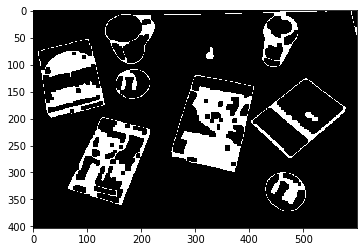

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
                    # 직사각형 모양으로 7*7 크기의 커널 매트릭스 생성
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow("",closed)

I found 4 books in that image


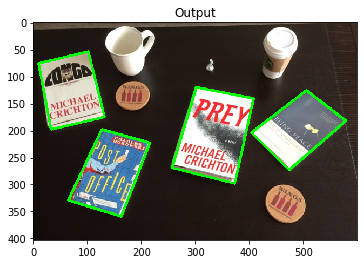

In [17]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0                    #컨투어라인 중 가장 바깥쪽만 찾음 #contours line을 그릴 수 있는 point만 저장   

for c in cnts:
    peri = cv2.arcLength(c, True)  #컨투어의 둘레를 구함
    approx = cv2.approxPolyDP(c, 0.02 * peri, True) 
    
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1

print("I found {0} books in that image".format(total))
imshow("Output", image)

In [ ]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

# 제대로 못씀 다시 확인
cv2.drawContours(image, cnts, -1,())
cv2.imwrite("out.png")

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [ ]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

## cv2.HoughCircles : 영상에서 원을 찾아주는 함수

In [20]:
img = cv2.imread('stone.png')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
#         edge판단의 문턱값. 값이 작으면 많은 edge가 검출된다.
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 
                           1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
                # 1로 주면 그대로 나오고, 2로 주면 출력영상은 절반으로 줄어 든 값이 출력된다.
                # 20은 최소 원과 원 사이의 거리가 이정도는 되어야한다고 지정한 것(노이즈 제거 방법)  
                # min|maxRadius : 최소|최대 반지름. (노이즈 제거 방법)
print(circles)

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]


[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]


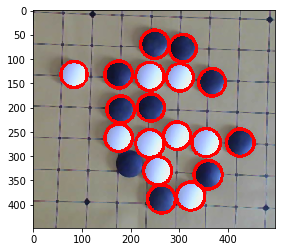

In [21]:
circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x,y),r, (0,0,255),5)   # 원을 검출
#     crop_img = img[y - r:y + r, x - r:x + r]    
#     txt, threshold = detect_weiqi(crop_img)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

In [28]:
from collections import Counter
def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [29]:
c = Counter([0,0,0,5,2,2,3,4,5,6])
print(c.most_common())

c = Counter([0,0,0,255,255,0,255])
print(c.most_common())

[(0, 3), (5, 2), (2, 2), (3, 1), (4, 1), (6, 1)]
[(0, 4), (255, 3)]


[(255, 2124), (0, 1012)]
[(0, 2876), (255, 488)]
[(255, 2166), (0, 970)]
[(255, 2362), (0, 1002)]
[(255, 2218), (0, 1146)]
[(255, 2121), (0, 1015)]
[(255, 2254), (0, 1110)]
[(0, 2869), (255, 267)]
[(0, 2749), (255, 387)]
[(255, 2366), (0, 998)]
[(0, 2893), (255, 243)]
[(0, 3025), (255, 339)]
[(0, 2881), (255, 255)]
[(0, 2914), (255, 222)]
[(255, 1962), (0, 954)]
[(255, 2255), (0, 1109)]
[(0, 2808), (255, 328)]
[(0, 3038), (255, 326)]


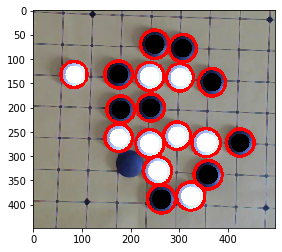

In [27]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x,y),r, (0,0,255),5)   # 원을 검출
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x,y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x,y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

## 상하 좌우 반전

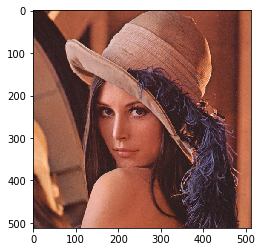

In [31]:
img = cv2.imread('lena.png')
img2 = cv2.flip(img,1) # 1은 좌우반전, 0은 상하반전
imshow("",img2)

## 영상 크기 변화

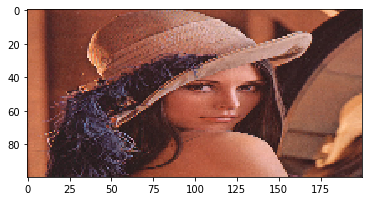

In [35]:
img = cv2.imread('lena.png')
zoom1 = cv2.resize(img, (200,100), interpolation=cv2.INTER_CUBIC)
# interpolaton = cv2.INTER_AREA
imshow("",zoom1)

(512, 512, 3)


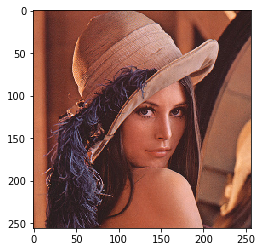

In [36]:
# 비율을 이용하여 영상 크기 변화
# 상대적으로 변화시키기때문에 훨씬 효율적이다
img = cv2.imread('lena.png')
print(img.shape)
res = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
imshow("",res)

## cropping

(200, 290)


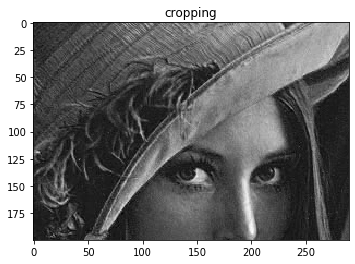

In [37]:
cropping = img[100:300, 120:410, 0]
print(cropping.shape)
imshow("cropping", cropping)

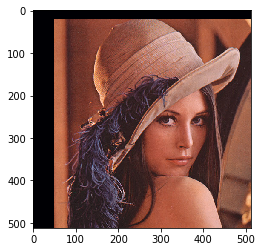

In [39]:
# 변환행렬
height, width = img.shape[:2]

M = np.float32([
    [1,0,50],    # x축으로 50
    [0,1,20]])   # y축으로 20 이동
dst = cv2.warpAffine(img, M, (width, height),
                    borderValue=(int(c[0]), int(c[1]), int(c[2]) ))
imshow("",dst)

# 빈공간을 채우는 것은, 딥러닝으로 배경이 늘어난 것 처럼보여주는게 일반적이다.

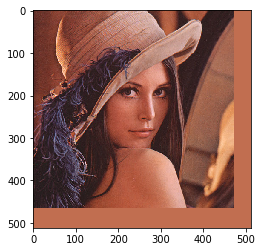

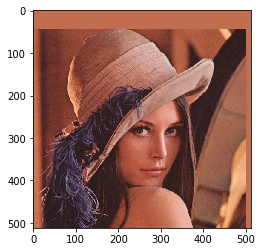

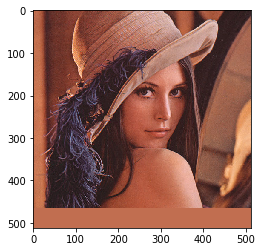

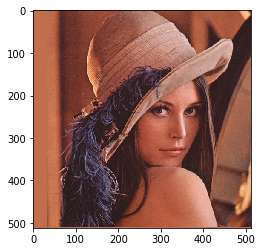

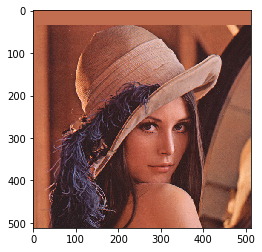

In [40]:
img = cv2.imread("lena.png")
height, width = img.shape[:2]

dx = 50
r = np.random.randint(dx*2, size=(5,2)) - dx

M = np.float32([
    [1,0,0],
    [0,1,0]])

c = img[0,0]

for p in r.tolist():
    M[:,2] = p
    dst = cv2.warpAffine(img, M, (width, height), 
                         borderValue=(int(c[0]), int(c[1]), int(c[2]) ))
    imshow("",dst)

In [45]:
print(img.shape)
print(height)
print(width)
print(r)
print(c)

(512, 512, 3)
512
512
[[-39 -46]
 [-11  45]
 [ -1 -46]
 [ 34  -2]
 [  7  36]]
[ 80 110 193]


## 이미지 회전
> getRotationMatrix2D(center, angle, scale)

**parameter**
- center: 이미지의 중심 좌표
- angle: 회전 시키는 각도  θ (시계 반대방향)
- scale: 변환하려는 크기 비율  s

이미지회전축에따라 화면에서 이미지가 사라질수도 있기 때문에 센터를 잘 지정해줘야한다.

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]
(512, 512, 3)


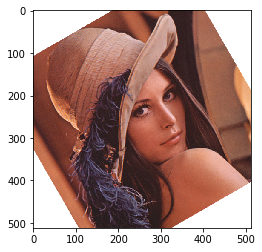

In [47]:
height, width = img.shape[:2]
img_center = (width/2, height/2)
M = cv2.getRotationMatrix2D(img_center, 30, 1.0)
print(M)

rotated_image = cv2.warpAffine(img, M, (width,height),
                              borderValue=(255,255,255))
print(rotated_image.shape)

imshow("",rotated_image)

In [97]:
img = cv2.imread("namecard.png")
height, width = img.shape[:2]

point_list = [[27,179],[611,36],[118,534],[754,325]]
# 좌표 순서: 상단 왼쪽 끝, 상단 오른쪽 끝, 하단 왼쪽 끝, 하단 오른쪽 끝
pts1 = np.array(point_list, dtype="float32")
print(pts1)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]


In [89]:
# 구하고자하는 너비와 높이를 좌표의 직선거리를 이용해서 구해준다.
width
height

pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
print(pts2)

[[  0.    0. ]
 [405.5   0. ]
 [  0.  288.5]
 [405.5 288.5]]


In [90]:
M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)

[[ 6.11584185e-01 -1.56772284e-01  1.15494658e+01]
 [ 2.26751420e-01  9.26033771e-01 -1.71882333e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


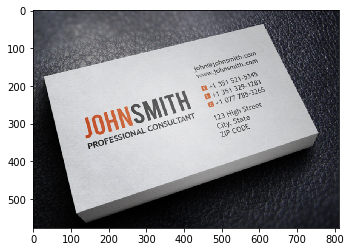

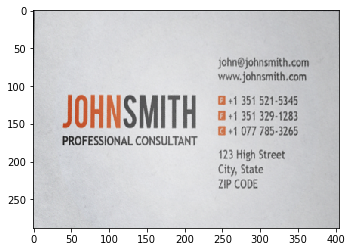

In [91]:
img_result = cv2.warpPerspective(img, M, (int(width/2), int(height/2) ) )
imshow("",img)
imshow("",img_result)

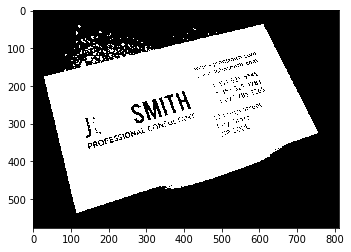

In [99]:
img = cv2.imread("namecard.png",0)
img_blur = cv2.GaussianBlur(img, (3, 3), 0)
_, binary = cv2.threshold(img_blur, 0, 255, 
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("",binary)